In [58]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
PROJ_DIR = os.path.realpath("/home/bthorne/projects/gan/began")
DATA_DIR = os.path.join(PROJ_DIR, "data", "processed")
FILE_PATH = os.path.join(DATA_DIR, "HFI_SkyMap_545-field-Int_2048_R3.00_full.hdf5")

with h5py.File(FILE_PATH, 'r') as f:
    group = f['Intensity/Planck']
    ntrain = group.attrs['NPATCHES']
    res = group.attrs['RES']
    train_data = group[...]
    lonras = group.attrs['LONRAS_HPIX']
    latras = group.attrs['LATRAS_HPIX']

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x_train_fit = scaler.transform(x_train)

In [26]:
pca = PCA(n_components=100)

In [27]:
pca.fit_transform(x_train_fit)

array([[-1.01770822e+02, -7.00577936e+00,  1.05799972e+01, ...,
         8.96107310e-02,  3.10819250e-02, -2.70591504e-01],
       [-1.03588257e+02, -6.39216066e+00,  1.19424759e+01, ...,
        -1.63343456e-01, -2.43944438e-01,  5.03988121e-02],
       [-1.03516998e+02, -7.46902158e+00,  1.18725509e+01, ...,
         1.50421933e-01,  1.92276692e-02, -2.52643194e-02],
       ...,
       [-9.50523152e+01, -7.51356579e+00,  9.05179571e+00, ...,
        -5.55065405e-02, -1.00397585e-01, -4.98120565e-02],
       [-9.61275806e+01, -7.09710146e+00,  9.07161691e+00, ...,
        -1.09095639e-01,  5.30175577e-02, -1.09958661e-01],
       [-9.89516815e+01, -9.45484234e+00,  9.87744418e+00, ...,
        -4.23350712e-02,  1.25512215e-01,  1.77654715e-01]])

In [28]:
x_train_pca = pca.transform(x_train_fit)

In [29]:
x_train_pca.shape

(256, 100)

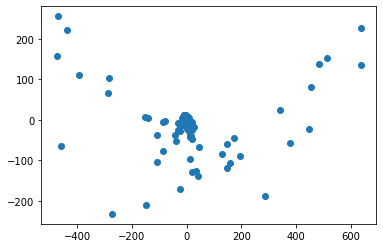

In [30]:
plt.scatter(x_train_pca[:, 1], x_train_pca[:, 2])

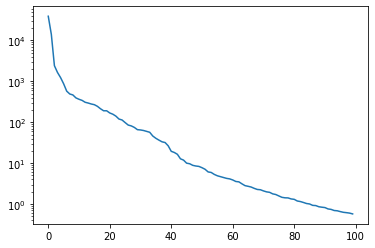

In [34]:
plt.semilogy(pca.explained_variance_)

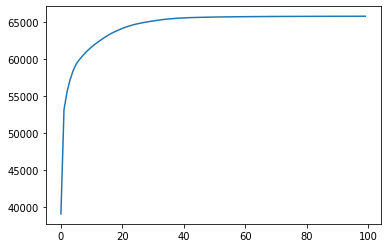

In [33]:
plt.plot(np.cumsum(pca.explained_variance_))

Text(0, 0.5, 'Cumulative explained variance')

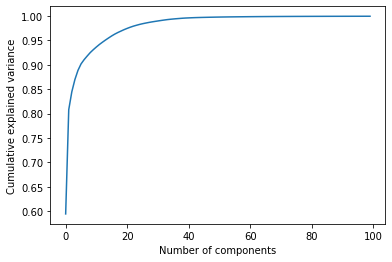

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:

minmax = MinMaxScaler((-1, 1))

In [92]:
minmax.fit(train_data)
x_train_minmax = minmax.transform(train_data)
print(train_data.shape)
print(x_train_minmax.shape)

(256, 256)
(256, 256)


In [90]:
idx = np.where(x_train_minmax>0)

(array([ 7., 11., 26., 36., 42., 44., 43., 24., 17.,  6.]),
 array([-0.94603177, -0.75142859, -0.55682542, -0.36222224, -0.16761906,
         0.02698411,  0.22158729,  0.41619047,  0.61079365,  0.80539682,
         1.        ]),
 <a list of 10 Patch objects>)

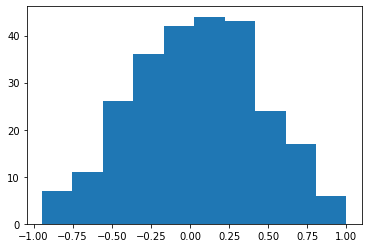

In [91]:
plt.hist(x_train_minmax[7])

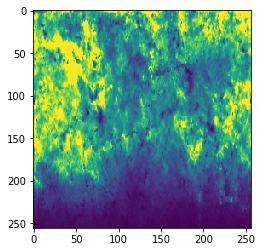

In [83]:
plt.imshow(x_train_minmax[8].reshape(256, 256))